In [2]:
# Import all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")

# East Africa fire incidence from 2013 to 2022

In [2]:
# Read the csv file obtained from FIRMS
df = pd.read_csv('FC2013_2022CL.csv', index_col=0, parse_dates=['ACQ_DATE'], low_memory=False)
df.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,CONFIDENCE,FRP,DAYNIGHT,TYPE,Year,Month,Weekday,FC,ADM0_NAME
ACQ_DATE,,,,,,,,,,,,
2022-09-01,11.04272,28.49781,314.32,n,1.42,N,0,2022,9,Thursday,1,Sudan
2022-09-02,15.64436,32.55453,350.26,n,7.10,D,0,2022,9,Friday,1,Sudan
2022-09-02,15.64608,32.55584,344.53,n,6.58,D,0,2022,9,Friday,1,Sudan
2022-09-02,11.60160,28.24219,305.77,n,1.01,N,0,2022,9,Friday,1,Sudan
2022-09-02,15.42719,32.64283,305.90,n,0.56,N,0,2022,9,Friday,1,Sudan


In [3]:
# Rename the column "ADM0_NAME" to "Country"
df.rename(columns={'ADM0_NAME': 'Country'}, inplace=True)
df.head(2)

,LATITUDE,LONGITUDE,BRIGHTNESS,CONFIDENCE,FRP,DAYNIGHT,TYPE,Year,Month,Weekday,FC,Country
ACQ_DATE,,,,,,,,,,,,
2022-09-01,11.04272,28.49781,314.32,n,1.42,N,0,2022,9,Thursday,1,Sudan
2022-09-02,15.64436,32.55453,350.26,n,7.10,D,0,2022,9,Friday,1,Sudan


# Exploratory data analysis

In [4]:
# check for missing values
df.isnull().sum()

LATITUDE         0
LONGITUDE        0
BRIGHTNESS       0
CONFIDENCE       0
FRP              0
DAYNIGHT         0
TYPE             0
Year             0
Month            0
Weekday          0
FC               0
Country       1675
dtype: int64

In [5]:
# check for the type of fire
df.TYPE.unique()

array([0, 2, 3, 1], dtype=int64)

In [6]:
# information about the columns and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14413394 entries, 2022-09-01 to 2017-12-14
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   LATITUDE    float64
 1   LONGITUDE   float64
 2   BRIGHTNESS  float64
 3   CONFIDENCE  object 
 4   FRP         float64
 5   DAYNIGHT    object 
 6   TYPE        int64  
 7   Year        int64  
 8   Month       int64  
 9   Weekday     object 
 10  FC          int64  
 11  Country     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 1.4+ GB


In [7]:
# Add season as new column based on the Month column
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
df['Season'] = df['Month'].apply(lambda x: season_dict[x])
df.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,CONFIDENCE,FRP,DAYNIGHT,TYPE,Year,Month,Weekday,FC,Country,Season
ACQ_DATE,,,,,,,,,,,,,
2022-09-01,11.04272,28.49781,314.32,n,1.42,N,0,2022,9,Thursday,1,Sudan,Fall
2022-09-02,15.64436,32.55453,350.26,n,7.10,D,0,2022,9,Friday,1,Sudan,Fall
2022-09-02,15.64608,32.55584,344.53,n,6.58,D,0,2022,9,Friday,1,Sudan,Fall
2022-09-02,11.60160,28.24219,305.77,n,1.01,N,0,2022,9,Friday,1,Sudan,Fall
2022-09-02,15.42719,32.64283,305.90,n,0.56,N,0,2022,9,Friday,1,Sudan,Fall


In [8]:
# Retain only fire types that are persumed vegetation
df = df[df['TYPE']==0]
df.head(3)

,LATITUDE,LONGITUDE,BRIGHTNESS,CONFIDENCE,FRP,DAYNIGHT,TYPE,Year,Month,Weekday,FC,Country,Season
ACQ_DATE,,,,,,,,,,,,,
2022-09-01,11.04272,28.49781,314.32,n,1.42,N,0,2022,9,Thursday,1,Sudan,Fall
2022-09-02,15.64436,32.55453,350.26,n,7.10,D,0,2022,9,Friday,1,Sudan,Fall
2022-09-02,15.64608,32.55584,344.53,n,6.58,D,0,2022,9,Friday,1,Sudan,Fall


In [9]:
# Descriptive statistics of fire radiative power among years
df1 = df.groupby(['Season', 'Year'])['FRP'].agg(['mean','std','min','max'])
df1 = df1.reset_index()
df1.head()

,Season,Year,mean,std,min,max
0,Fall,2013,9.649289,14.962294,0.11,1882.10
1,Fall,2014,9.077087,12.556031,0.09,619.18
2,Fall,2015,9.171955,13.266737,0.06,597.61
3,Fall,2016,9.961196,14.514761,0.00,579.29
4,Fall,2017,9.398391,13.995204,0.08,1448.09


In [10]:
df2 = df1.groupby(['Season', 'Year'])['mean', 'std', 'min', 'max'].mean()
df2.head()

mean        std   min      max
Season Year                                    
Fall   2013  9.649289  14.962294  0.11  1882.10
       2014  9.077087  12.556031  0.09   619.18
       2015  9.171955  13.266737  0.06   597.61
       2016  9.961196  14.514761  0.00   579.29
       2017  9.398391  13.995204  0.08  1448.09

In [11]:
# Group by Season and Year, and aggregate using mean, std, min, max
df2 = df2.groupby(['Season', 'Year'])['mean', 'std', 'min', 'max'].mean().reset_index()

# Reshape the data for visualization
df2 = df2.melt(id_vars=['Season', 'Year'], var_name='Stat', value_name='Value')

In [12]:
df2.head()

,Season,Year,Stat,Value
0,Fall,2013,mean,9.649289
1,Fall,2014,mean,9.077087
2,Fall,2015,mean,9.171955
3,Fall,2016,mean,9.961196
4,Fall,2017,mean,9.398391


<Figure size 1000x400 with 0 Axes>

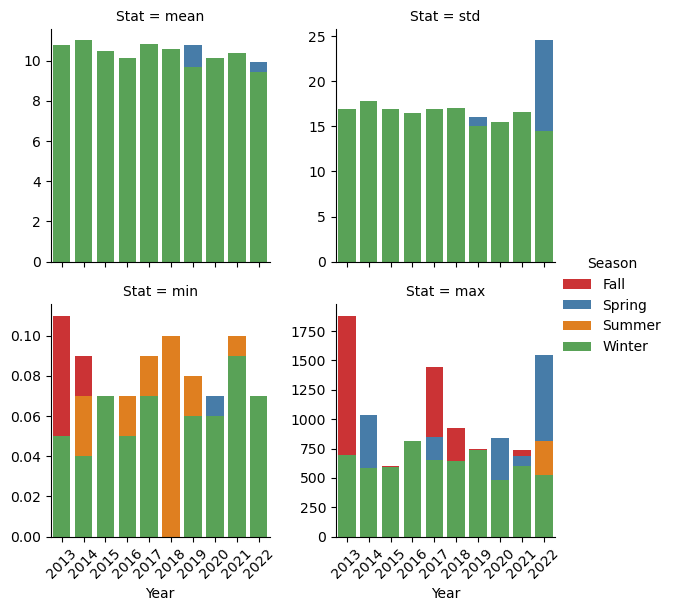

In [13]:
g = plt.figure(tight_layout=True, figsize=(10,4))
palette = {'Winter': '#4daf4a', 'Spring': '#377eb8', 'Summer': '#ff7f00', 'Fall': '#e41a1c'}

# Create a facet grid plot
g = sns.FacetGrid(df2, col='Stat', hue='Season', sharey=False, col_wrap=2, palette=palette)
g.map(sns.barplot, 'Year', 'Value', order=[2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])

# Set the plot labels and legend
g.set_axis_labels('Year', '')
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]
g.add_legend()
plt.savefig('FRP_stat.tif', dpi=300, bbox_inches='tight');

In [14]:
# Maximum FRP
df2[df2['Stat']=="std"]['Value'].max()

24.54774240590989

In [15]:
# Minimmum FRP
df.FRP.min()

0.0

# Time-series Analysis

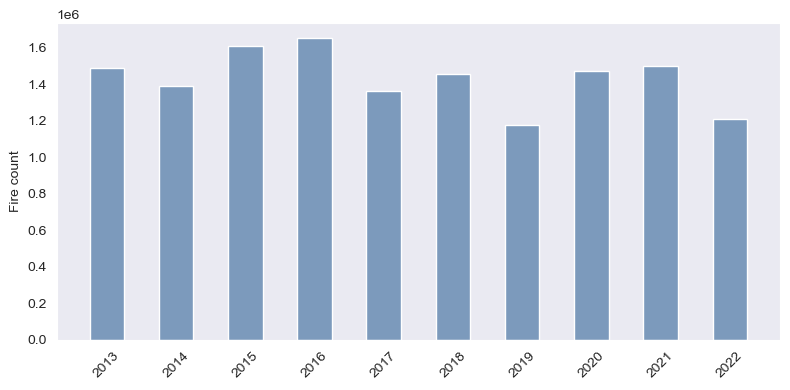

In [16]:
# Annual open biomass burning incidence using bar plot
yearly = df.groupby('Year')['FC'].sum()
yearly = yearly.to_frame().reset_index()
plt.figure(tight_layout=True, figsize=(8,4))
sns.set_style('dark')

plt.bar(data=yearly, x='Year', height='FC',  color=(0.2, 0.4, 0.6, 0.6), width = 0.5)
plt.ylabel('Fire count')
plt.xticks(rotation=45, ha='center', ticks=[2013, 2014,2015,2016,2017,2018,2019,2020,2021,2022]);
#plt.savefig('Annual FC.tif', dpi=300);

In [17]:
# Fire incidence in each year in East Africa
yearly

,Year,FC
0,2013,1487441
1,2014,1391797
2,2015,1609319
3,2016,1651181
4,2017,1360684
5,2018,1456273
6,2019,1177691
7,2020,1474579
8,2021,1496887
9,2022,1206920


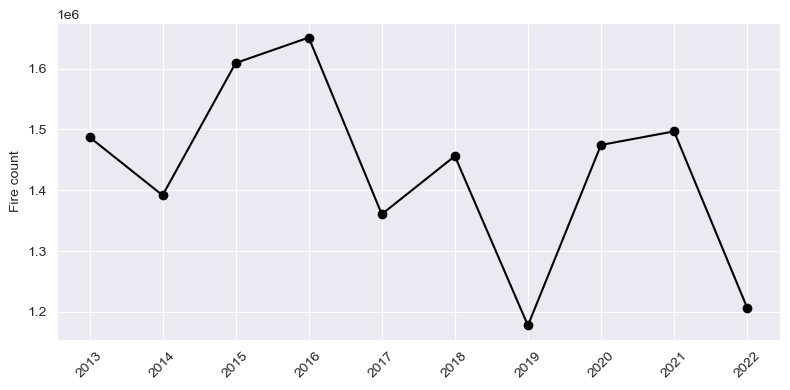

In [18]:
# Yearly open biomass burning using line plot
sns.set_style('darkgrid')
plt.figure(tight_layout=True, figsize=(8,4))
plt.plot(yearly['Year'], yearly['FC'],  color='k', marker='o')
plt.ylabel('Fire count')
plt.xticks(rotation=45, ha='center', ticks=[2013, 2014,2015,2016,2017,2018,2019,2020,2021,2022]);

In [19]:
# Exporting the annula fire incidence as csv file
year_count = df.groupby(['Country', 'Year'])['FC'].sum()
year_count = year_count.to_frame().reset_index()
year_count.to_csv('Year_count.csv')

In [20]:
# Monthly and weekday open biomass burning incidence 
monthly = df.groupby('Month')['FC'].sum()
monthly = monthly.to_frame().reset_index()
weekday = df.groupby('Weekday')['FC'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday = weekday.to_frame().reset_index()

In [21]:
# Precentage of each month burning count to the overall incidence 
monthly['Percentage'] = ((monthly['FC']) / (monthly['FC'].sum())) * 100
monthly

,Month,FC,Percentage
0,1,2632265,18.391022
1,2,1620839,11.324424
2,3,922786,6.447291
3,4,379455,2.651164
4,5,158858,1.109904
5,6,474968,3.318491
6,7,822471,5.746413
7,8,815845,5.700119
8,9,787050,5.498935
9,10,964351,6.737696


In [22]:
# Precentage of each year burning count to the overall incidence 
yearly['Percentage'] = ((yearly['FC']) / (yearly['FC'].sum())) * 100
yearly

,Year,FC,Percentage
0,2013,1487441,10.392403
1,2014,1391797,9.724161
2,2015,1609319,11.243937
3,2016,1651181,11.536417
4,2017,1360684,9.506782
5,2018,1456273,10.174640
6,2019,1177691,8.228252
7,2020,1474579,10.302540
8,2021,1496887,10.458400
9,2022,1206920,8.432469


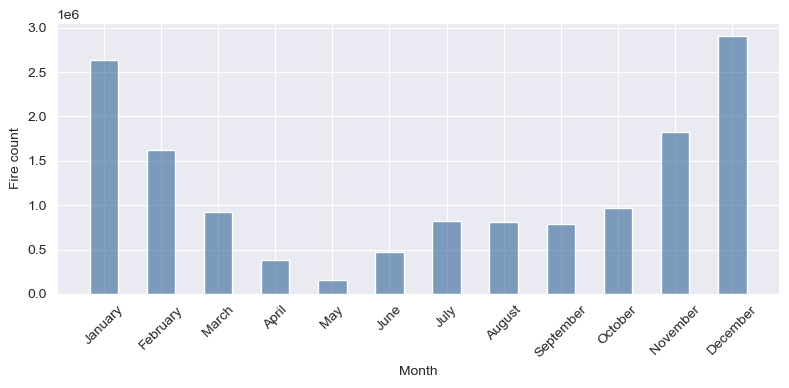

In [23]:
# Visulalization each month burning count using bar plot 
import matplotlib.dates as mdates
plt.figure(tight_layout=True, figsize=(8,4))
plt.bar(data=monthly, x='Month', height='FC',  color=(0.2, 0.4, 0.6, 0.6), width = 0.5) #'#4d82ff','#002e99'
plt.ylabel('Fire count')
plt.xlabel('Month')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],rotation=45);
plt.savefig('Monthly FC.tif', dpi=300, bbox_inches='tight');

# One way ANOVA on OBB incidence among days of the week

In [47]:
# Grouping fire incidence in each day and year of the week 
dw = df.groupby(['Weekday','Year']).sum()

C:\Users\YACOB\AppData\Local\Temp\ipykernel_8176\872398461.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dw = df.groupby(['Weekday','Year']).sum()


LATITUDE     LONGITUDE   BRIGHTNESS         FRP  TYPE  \
Weekday   Year                                                               
Friday    2013  675314.738681  6.744242e+06  70563577.02  2139737.17     0   
          2014  737845.917592  6.178261e+06  65406343.09  1989795.68     0   
          2015  865218.586824  7.411783e+06  77347484.96  2245920.05     0   
          2016  809928.161999  7.505183e+06  79196481.83  2294496.46     0   
          2017  804967.352587  6.303021e+06  66657225.89  2069835.06     0   
...                       ...           ...          ...         ...   ...   
Wednesday 2018  911315.975912  7.011146e+06  73769770.27  2220930.08     0   
          2019  575827.788040  5.303151e+06  55504688.51  1571433.84     0   
          2020  823822.152090  7.080194e+06  74494302.18  2135894.08     0   
          2021  769256.713770  6.810434e+06  70952096.30  2043939.72     0   
          2022  578529.622489  5.395348e+06  56456294.56  1545096.50     0   

                  Month      FC  
Weekday   Year                   
Friday    2013  1346512  208722  
          2014  1225863  193623  
          2015  1433973  229783  
          2016  1667946  234896  
          2017  1424701  197015  
...                 ...     ...  
Wednesday 2018  1541874  218309  
          2019  1057010  164623  
          2020  1507120  220292  
          2021  1414219  210304  
          2022  1092139  167382  

[70 rows x 7 columns]

In [48]:
# creating pivot table to better visualize the fire incidence in each year and day of the week
pivot_table = dw.pivot_table(columns='Weekday', values='FC', index='Year')
pivot_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2013,208722,219568,214695,208991,205999,224007,205459
2014,193623,203626,207944,201318,183427,200529,201330
2015,229783,228053,227682,229467,242483,223798,228053
2016,234896,244353,253616,240154,218953,235778,223431
2017,197015,190723,191226,192396,197807,186863,204654
2018,204003,221834,197587,191650,219949,202941,218309
2019,160428,165390,175349,175026,162484,174391,164623
2020,196190,200993,218681,204000,230310,204113,220292
2021,222757,211412,221198,219689,201521,210006,210304


In [49]:
# one way ANOVA to test the difference in the total incidence of biomass burning among the days of the week
F, p = stats.f_oneway(pivot_table['Monday'], pivot_table['Tuesday'], pivot_table['Wednesday'], pivot_table['Thursday'], pivot_table['Friday'], pivot_table['Saturday'], pivot_table['Sunday'])
# Print the results
print("One-way ANOVA Results:")
print("F-value:", F)
print("p-value:", p)

One-way ANOVA Results:
F-value: 0.10476443255847599
p-value: 0.9955999767536786


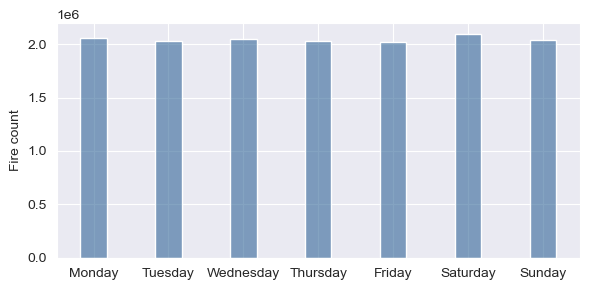

In [23]:
# Visulalization each day of the week burning count using bar plot 
plt.figure(tight_layout=True, figsize=(6,3))
#sns.barplot(data=weekday, y='FC', x='Weekday', palette= 'flare') #'#4d82ff','#002e99'
plt.bar(data=weekday, x='Weekday', height='FC',  color=(0.2, 0.4, 0.6, 0.6), width = 0.35)

plt.ylabel('Fire count')
plt.savefig('Weekday FC.tif', dpi=300, bbox_inches='tight');

In [24]:
df_week = df.groupby(['Weekday', 'Season'])['FC'].sum()
df_week = df_week.to_frame().reset_index()
#df_week = df_week.set_index('Weekday')
df_week.head()

,Weekday,Season,FC
0,Friday,Fall,485756
1,Friday,Spring,206481
2,Friday,Summer,288571
3,Friday,Winter,1043311
4,Monday,Fall,507689


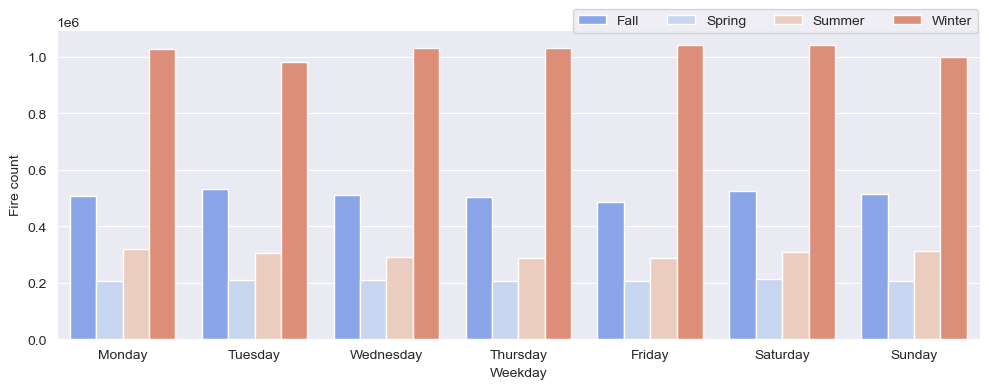

In [25]:
# Visualizing each day of the week burning count sliced by season using bar plot 
# define the category order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# create a custom palette with a range of blue colors
custom_palette = sns.color_palette(["#053C5E", "#115173", "#1D6A96", "#2894C0", "#75B8E8"])

# convert the Weekday column to a categorical variable with the weekday order
df_week['Weekday'] = pd.Categorical(df_week['Weekday'], categories=weekday_order, ordered=True)

# create the barplot with the sorted x-axis
plt.figure(tight_layout=True, figsize=(10,4))
sns.color_palette("viridis", 4)
sns.barplot(data=df_week, x='Weekday', y='FC', hue='Season', palette='coolwarm', order=weekday_order)
plt.legend(bbox_to_anchor =(1.005, 1.09), ncol = 4)
plt.ylabel('Fire count')
plt.savefig('WeeklySeason Fc.tif', dpi=300, bbox_inches='tight');

In [26]:
# group the data by year, day/night, and sum the fire counts
grouped_data = df.groupby([df['Year'], df['DAYNIGHT']])['FC'].sum()
# convert the grouped data to a DataFrame and reset the index
df_y = grouped_data.to_frame().reset_index()
df_y.head()

,Year,DAYNIGHT,FC
0,2013,D,1184015
1,2013,N,303426
2,2014,D,1121716
3,2014,N,270081
4,2015,D,1259896


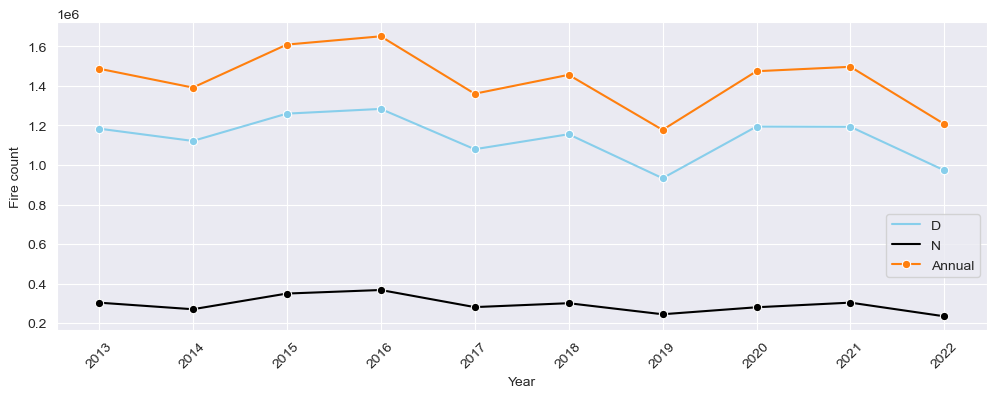

In [27]:
# Visualizing biomass burning count by day, night, and annual using line plot
fig, ax1 = plt.subplots(figsize=(12,4))
sns.lineplot(x='Year', y='FC',data=df_y,hue='DAYNIGHT', marker='o', palette = ['skyblue','k'],  sort = False)
sns.lineplot(x='Year', y='FC',data=yearly, marker='o', sort = False, label='Annual')
plt.xticks(rotation=45, ha='center', ticks=[2013, 2014,2015,2016,2017,2018,2019,2020,2021,2022])
plt.ylabel('Fire count')
plt.legend(bbox_to_anchor =(1.0, 0.4), ncol = 1)
plt.savefig('Annual FC.tif', dpi=300, bbox_inches='tight');

# Statistical Analysis (Plot among GDP, PopDensi, and FC)

In [3]:
df3 = pd.read_csv('GDP_FC_Area_Population.csv')
df3.head()

,Country,Year,GDP,FC,Population,Area,PopDen
0,Burundi,2013,241.547671,3914,10149577,26857,377.911792
1,Burundi,2014,257.818552,2573,10494913,26857,390.770116
2,Burundi,2015,289.359633,5240,10727148,26857,399.417210
3,Burundi,2016,242.065671,4562,10903327,26857,405.977101
4,Burundi,2017,243.135809,2286,11155593,26857,415.370034


In [4]:
df3.Country.unique()

array(['Burundi', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Rwanda',
       'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Uganda'],
      dtype=object)

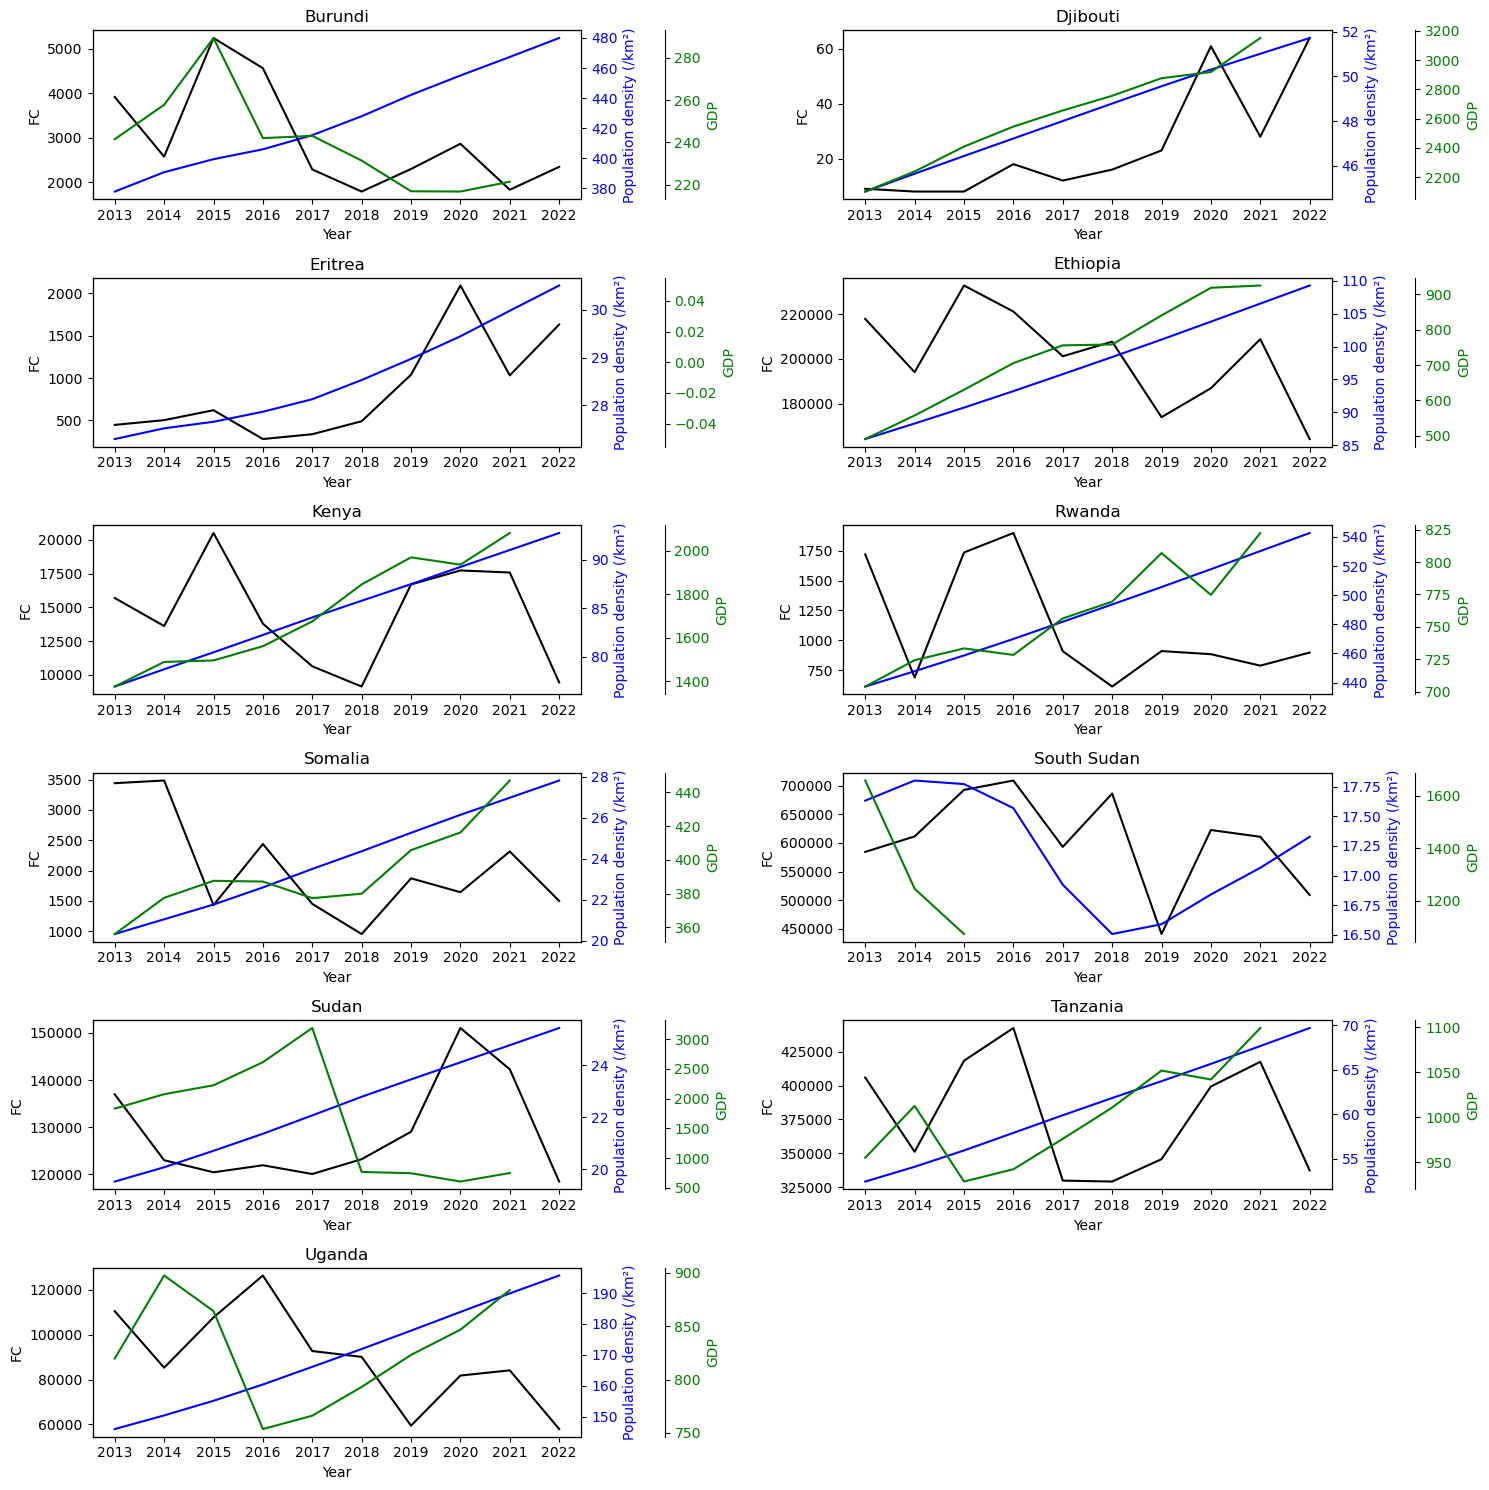

In [10]:
# assuming the data is in a dataframe named "df"
countries = df3['Country'].unique()

# check if number of countries is odd
if len(countries) % 2 == 1:
    num_plots = (len(countries) // 2) + 1
else:
    num_plots = len(countries) // 2

fig, axs = plt.subplots(num_plots, 2, figsize=(15, 15))

for i, country in enumerate(countries):
    row = i // 2
    col = i % 2
    
    df_country = df3[df3['Country'] == country]
    
    axs[row, col].plot(df_country['Year'], df_country['FC'], label='FC', color='black')
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel('FC')
    #axs[row, col].legend()
    
    ax2 = axs[row, col].twinx()
    ax2.plot(df_country['Year'], df_country['PopDen'], color='blue', label='Population density')
    ax2.set_ylabel('Population density (/km\u00b2)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    #ax2.legend(loc='upper right')

    # Set the tick labels
    ax2.set_xticks(df_country['Year'])
    ax2.set_xticklabels(df_country['Year'].astype(str), rotation=45)

    # Add a title to the subplot
    ax2.set_title(country)
    
    # Add a third x-axis on the right for GDP
    ax3 = axs[row, col].twinx()
    ax3.plot(df_country['Year'], df_country['GDP'], color='green', label='GDP')
    ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the third x-axis
    ax3.set_ylabel('GDP', color='green')
    ax3.tick_params(axis='y', labelcolor='green')
    #ax3.legend(loc='upper left')

# remove the last empty subplot if the number of countries is odd
if len(countries) % 2 == 1:
    fig.delaxes(axs[num_plots-1, 1])

plt.tight_layout()
plt.savefig('FC_PopDen_GDP.tif', dpi=300, bbox_inches='tight');

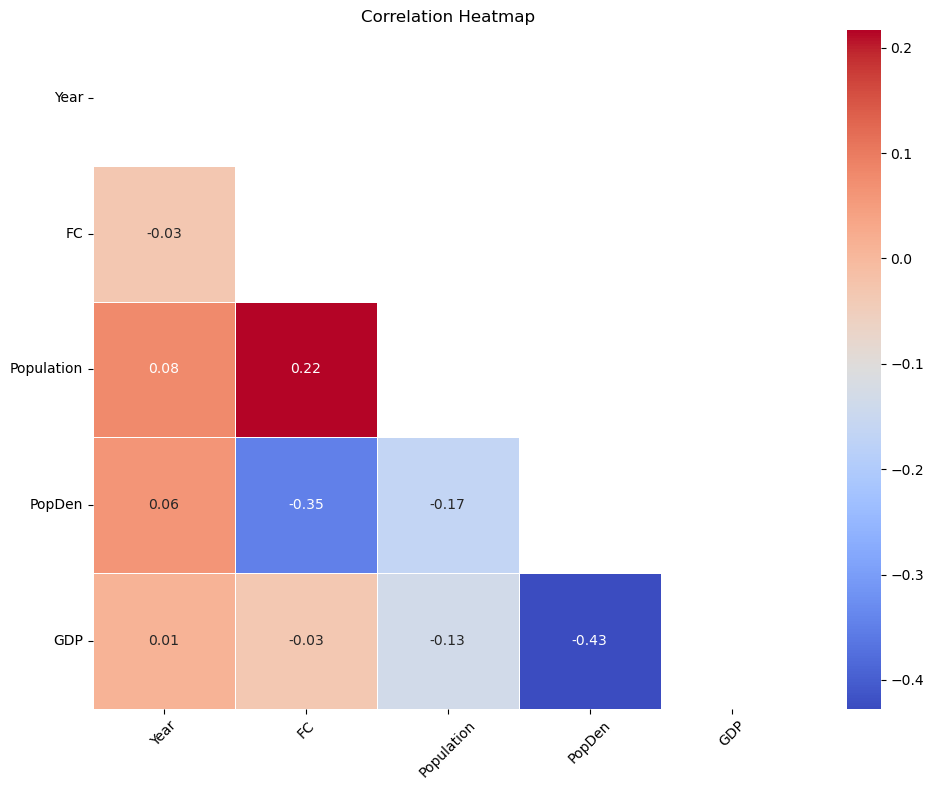

In [6]:
# Compute the correlation matrix
corr_matrix = df3.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the correlation heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)

# Customize the plot
ax.set_title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

In [17]:
countries = df3['Country'].unique()

results = pd.DataFrame(columns=['Country', 'Correlation'])
for country in countries:
    df_country = df3[df3['Country'] == country]
    corr = df_country['GDP'].corr(df_country['FC'])
    results = results.append({'Country': country, 'Correlation': corr}, ignore_index=True)

print(results)

                        Country  Correlation
0                       Burundi     0.684704
1                      Djibouti     0.645708
2                       Eritrea          NaN
3                      Ethiopia    -0.473663
4                         Kenya     0.061610
5                        Rwanda    -0.608371
6                       Somalia    -0.242538
7                   South Sudan    -0.870937
8                         Sudan    -0.661128
9                        Uganda    -0.389584
10  United Republic of Tanzania    -0.230905


In [8]:
countries = df3['Country'].unique()

results = pd.DataFrame(columns=['Country', 'Correlation'])
for country in countries:
    df_country = df3[df3['Country'] == country]
    corr = df_country['PopDen'].corr(df_country['FC'])
    results = results.append({'Country': country, 'Correlation': corr}, ignore_index=True)

print(results)

                        Country  Correlation
0                       Burundi    -0.584940
1                      Djibouti     0.779203
2                       Eritrea     0.667469
3                      Ethiopia    -0.626807
4                         Kenya    -0.208231
5                        Rwanda    -0.542560
6                       Somalia    -0.537004
7                   South Sudan     0.448827
8                         Sudan     0.315158
9                        Uganda    -0.707806
10  United Republic of Tanzania    -0.229230


C:\Users\YACOB\AppData\Local\Temp\ipykernel_9432\2354323327.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Country': country, 'Correlation': corr}, ignore_index=True)
C:\Users\YACOB\AppData\Local\Temp\ipykernel_9432\2354323327.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Country': country, 'Correlation': corr}, ignore_index=True)
C:\Users\YACOB\AppData\Local\Temp\ipykernel_9432\2354323327.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Country': country, 'Correlation': corr}, ignore_index=True)
C:\Users\YACOB\AppData\Local\Temp\ipykernel_9432\2354323327.py:7: FutureWarning: The frame.append method is deprecated and will be remov

# Forest Change (Source FAO)

In [3]:
data = pd.read_csv('data-dYGab.csv')
data.head()

,Country,Code,Change
0,Burundi,BDI,23.0
1,Djibouti,DJI,4.0
2,Eritrea,ERI,-2.0
3,Ethiopia,ETH,-3.0
4,Kenya,KEN,1.0


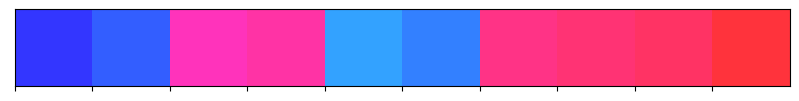

In [4]:
gyr = ['#3336FF','#335EFF','#FF33BB', '#FF33A5','#33A2FF', '#3380FF','#FF3386', '#FF3374','#FF3364', '#FF333C']
sns.palplot(sns.color_palette(gyr))

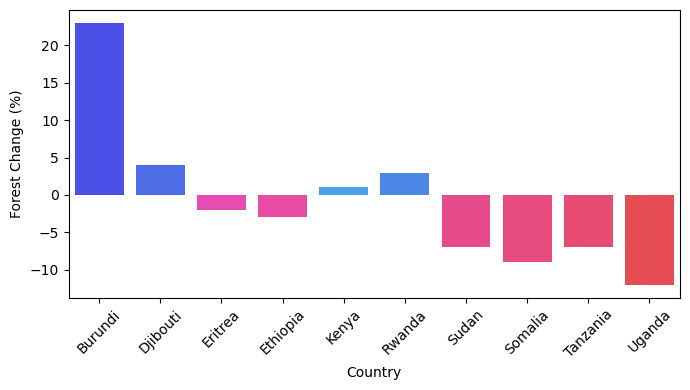

In [5]:
# Bar Plot
plt.figure(figsize=(7,4))
#sns.set_style('ticks')
sns.barplot(data=data, x='Country', y='Change',palette= gyr)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Forest Change (%)')
#plt.title('Forest Change Percentage by Country between 2012 to 2020')
plt.tight_layout()
plt.savefig('ForestChange.tif', dpi=300, bbox_inches='tight');